## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





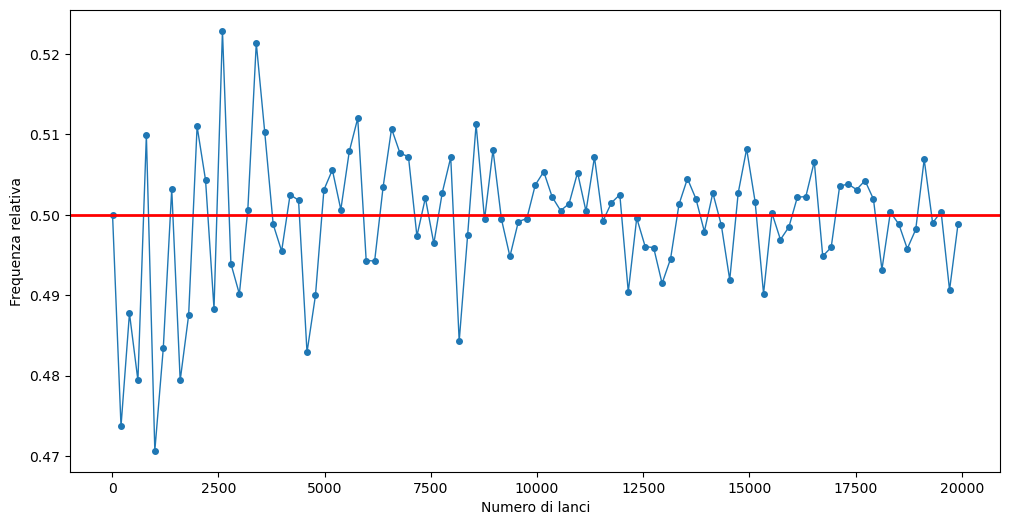

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulazione(N):
    #0=testa e 1=croce
    serie_pandas = pd.Series(np.random.randint(0, 2, size=N))
    return serie_pandas.value_counts(normalize=True).get(0) #divide per il numero totale di lanci, ovvero freq relative e con get cnsidero la label 0

risultati = {"N":[],"freq":[]}
for N in range(10,20000,199): #(20000-10)/100=199
    risultati["N"].append(N)
    risultati["freq"].append(simulazione(N))

plt.figure(figsize=(12, 6))
plt.plot(risultati['N'], risultati['freq'], 'o-', markersize=4, linewidth=1, label='Legge dei grandi numeri')
plt.xlabel('Numero di lanci (N)')
plt.xlabel('Numero di lanci')
plt.ylabel('Frequenza relativa')
plt.axhline(y=0.5, color='red', linestyle='-', linewidth=2)
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [ ]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

#1)
n_row, n_col = df.shape
#2)
df.isna().sum() #isna ritorna una maschera True e False e vado a sommare tutte le colonne
#3)
moda = df["Embarked"].mode()[0] #prendo il valore della moda, che è il più frequente
df["Embarked"].fillna(moda, inplace=True)
#4)
df.dropna(subset=["Age"], inplace=True) #subset perchè sennò eliminerebbe ogni riga con NaN e poi vuole le parentesi quadre perchè si
#5)
duplicati = df.duplicated().sum() #ritorna un vettore True e False, quindi li sommo se è 1 ci sono duplicati sennò no
#6)
av_age = df.groupby("Pclass")["Age"].mean()
av_age


C:\Users\Casa\AppData\Local\Temp\ipykernel_21544\326646457.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(moda, inplace=True)


KeyError: 'Age'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()